In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt

In [2]:
df = pd.read_csv("Ads_Optimisation.csv")

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for m in range(N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = df.values[m, ad]
    total_reward = total_reward + reward

In [5]:
pd.Series(ads_selected).head(1000).value_counts(normalize=False)

5    110
3    106
4    105
0    104
8    102
1    101
9     98
7     93
6     91
2     90
dtype: int64

In [6]:
#Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0]*d
sum_of_reward = [0]*d
total_reward = 0

In [7]:
for n in range(5000):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(number_of_selections[i] > 0):
            average_reward = sum_of_reward[i] / number_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_of_reward[ad] += reward
    total_reward += reward

In [8]:
pd.Series(ads_selected).tail(1000).value_counts(normalize=True)

4    0.681
0    0.098
7    0.066
6    0.063
8    0.026
1    0.019
3    0.014
2    0.012
9    0.011
5    0.010
dtype: float64

Text(0, 0.5, 'No. of times each ad was selected by the algorithm')

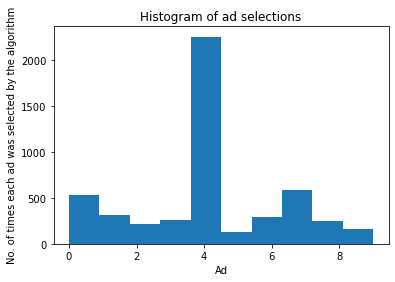

In [9]:
pt.hist(ads_selected)
pt.title("Histogram of ad selections")
pt.xlabel("Ad")
pt.ylabel("No. of times each ad was selected by the algorithm")

In [10]:
print(total_reward)

993
